In [28]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
df=pd.read_csv('height_weight.csv')

In [29]:
df1=df.drop(['weight'],axis='columns')
df1.sample(5)

,gender,height
1647,Male,68.176306
4216,Male,69.498946
8096,Female,62.625049
6015,Female,64.393693
2473,Male,66.014958


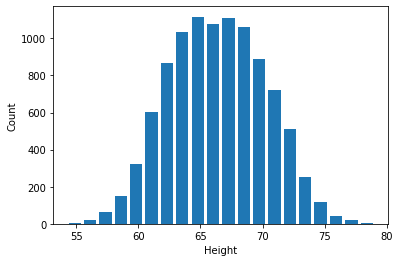

In [37]:
plt.hist(df1.height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

In [38]:
df.height.max()

78.9987423463896

In [39]:
df.height.min()

54.2631333250971

In [40]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

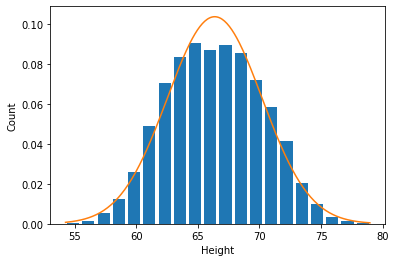

In [60]:
from scipy.stats import norm
import numpy as np
plt.hist(df1.height, bins=20, rwidth=0.8,density=True)
plt.xlabel('Height')
plt.ylabel('Count')
rng=np.arange(df1.height.min(),df1.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df1.height.mean(),df1.height.std()))

In [65]:
df1.height.mean()

66.36755975482124

In [66]:
df1.height.std()

3.8475281207732293

In [67]:
upper_limit=df1.height.mean() + 3*df1.height.std()
upper_limit

77.91014411714093

In [68]:
lower_limit=df1.height.mean() - 3*df1.height.std()
lower_limit

54.82497539250156

In [70]:
df1[(df1.height<lower_limit) | (df1.height>upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [71]:
df2=df1[(df1.height>lower_limit) & (df1.height<upper_limit)]
df2

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [72]:
df1.shape[0]-df2.shape[0]

7

In [74]:
df['zscore']=(df.height-df.height.mean())/df.height.std()
df.head(5)

,gender,height,weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [76]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [77]:
df1=df[(df.zscore>-3) & (df.zscore<3)]
df1

,gender,height,weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [78]:
df.shape[0]-df1.shape[0]

7